In [1]:
import gym
import robo_gym
from robo_gym.wrappers.exception_handling import ExceptionHandling

import numpy as np

In [2]:
target_machine_ip = 'localhost' # or other machine 'xxx.xxx.xxx.xxx'

# initialize environment
env = gym.make('CubeRoomSearchLikeContinuously-v0', ip=target_machine_ip, gui=True, max_episode_steps=500)
env = ExceptionHandling(env)

state = env.reset()

Starting new Robot Server | Tentative 1
<class 'server_manager_pb2.RobotServer'>
True 
Successfully started Robot Server at localhost:60603


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
for _ in range(10):
    env.reset(new_agent_pose=True)

In [10]:
state, reward, done, info = env.step(env.action_space.sample())
print(reward)

-0.05


In [3]:
total_reward = 0
done = False
while not done:
    # random step in the environment
    state, reward, done, info = env.step(env.action_space.sample())
    print(reward)
    total_reward += reward
    
print(total_reward, info)

-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
49.95
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
0.0
0.0
-0.05
0.0
0.0
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
0.0
-0.05
0.0
-0.05
-0.05
-0.05
0.0
-0.05
0.0
-0.05
0.0
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
0.0
0.0
0.0
-0.05
-0.05
49.95
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
0.0
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.05
-0.0

In [6]:
print(f"Target found: {np.sum(env.target_found)}/{len(env.target_found)}")

Target found: 3 


In [3]:
for _ in range(10):
    env.reset(new_agent_pose=True)
    total_reward = 0
    done = False
    while not done:
        # random step in the environment
        state, reward, done, info = env.step(env.action_space.sample())
        total_reward += reward
        
    print(f"Target found: {np.sum(env.target_found)}/{len(env.target_found)}")
    print(total_reward, info)

Target found: 6/12
279.94999999999607 {'final_status': 'max_steps_exceeded', 'TimeLimit.truncated': False}
Target found: 6/12
278.1499999999957 {'final_status': 'max_steps_exceeded', 'TimeLimit.truncated': False}
Target found: 6/12
279.24999999999574 {'final_status': 'max_steps_exceeded', 'TimeLimit.truncated': False}
Target found: 8/12
379.59999999999684 {'final_status': 'max_steps_exceeded', 'TimeLimit.truncated': False}
Target found: 3/12
127.89999999999687 {'final_status': 'max_steps_exceeded', 'TimeLimit.truncated': False}
Target found: 3/12
126.59999999999594 {'final_status': 'max_steps_exceeded', 'TimeLimit.truncated': False}
Target found: 7/12
328.59999999999553 {'final_status': 'max_steps_exceeded', 'TimeLimit.truncated': False}
Target found: 7/12
328.64999999999895 {'final_status': 'max_steps_exceeded', 'TimeLimit.truncated': False}
Target found: 6/12
278.7499999999966 {'final_status': 'max_steps_exceeded', 'TimeLimit.truncated': False}
Target found: 6/12
278.94999999999766 {

In [8]:
state = env.reset(new_agent_pose=True)

{-1: 15387, 0: 841, 5: 29, 6: 19, 11: 19, 12: 10, 17: 8, 18: 25, 24: 27, 25: 1, 30: 6, 31: 4, 36: 1, 37: 4, 43: 3}
{-1: 15387, 0: 841, 5: 29, 6: 19, 11: 19, 12: 10, 17: 8, 18: 25, 24: 27, 25: 1, 30: 6, 31: 4, 36: 1, 37: 4, 43: 3}


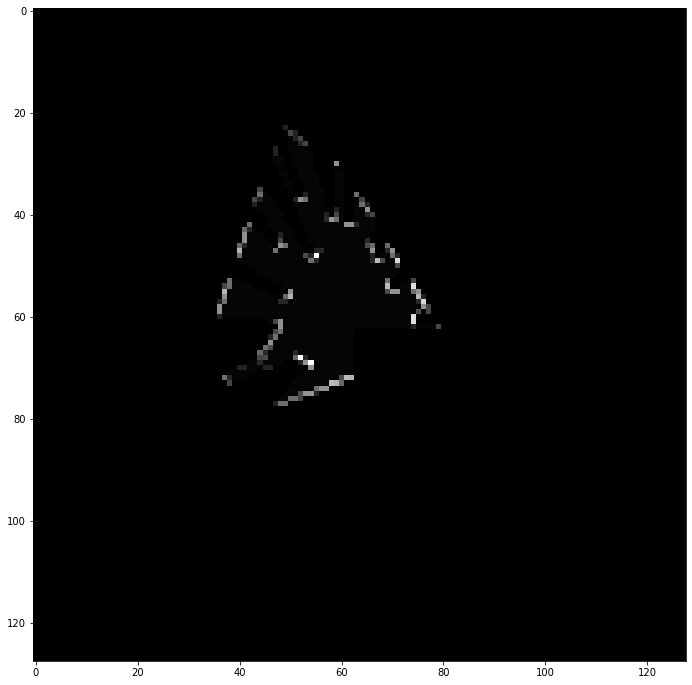

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 12,12

o = np.array(state['occupancy_grid'], dtype=np.int16)
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))

# o[o == 0] = 255
# o[o == 100] = 0
# o[o == -1] = 128
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))
img = o.reshape((env.map_size,env.map_size)).T
plt.imshow(img, cmap='gray') 